In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


con = sqlite3.connect('../remote.db')

In [2]:
factfinance = pd.read_sql_query(f"select * from factfinance ",con=con)

df = factfinance.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39409 entries, 0 to 39408
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               39409 non-null  int64  
 1   FinanceKey          39409 non-null  float64
 2   DateKey             39409 non-null  float64
 3   OrganizationKey     39409 non-null  float64
 4   DepartmentGroupKey  39409 non-null  float64
 5   ScenarioKey         39409 non-null  float64
 6   AccountKey          39409 non-null  float64
 7   Amount              39409 non-null  float64
 8   Date                39409 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 2.7+ MB


In [4]:
df

,index,FinanceKey,DateKey,OrganizationKey,DepartmentGroupKey,ScenarioKey,AccountKey,Amount,Date
0,0,1.0,20101229.0,3.0,1.0,1.0,60.0,22080.0,2010-12-29 00:00:00.000000
1,1,2.0,20101229.0,3.0,1.0,2.0,60.0,20200.0,2010-12-29 00:00:00.000000
2,2,3.0,20101229.0,3.0,1.0,2.0,61.0,2000.0,2010-12-29 00:00:00.000000
3,3,4.0,20101229.0,3.0,1.0,1.0,61.0,2208.0,2010-12-29 00:00:00.000000
4,4,5.0,20101229.0,3.0,1.0,1.0,62.0,1546.0,2010-12-29 00:00:00.000000
...,...,...,...,...,...,...,...,...,...
39404,39404,39405.0,20131228.0,13.0,7.0,1.0,42.0,225000.0,2013-12-28 00:00:00.000000
39405,39405,39406.0,20131228.0,13.0,7.0,1.0,43.0,-225000.0,2013-12-28 00:00:00.000000
39406,39406,39407.0,20131228.0,13.0,7.0,1.0,85.0,-1957.7,2013-12-28 00:00:00.000000
39407,39407,39408.0,20131228.0,13.0,7.0,1.0,92.0,17619.3,2013-12-28 00:00:00.000000


In [5]:
df.FinanceKey.is_unique

True

In [6]:
df['Amount'].describe().apply(lambda x: format(x, 'f'))

count       39409.000000
mean        34475.384118
std        164041.892959
min      -1121918.000000
25%           107.140000
50%           380.000000
75%          9056.250000
max       4820988.000000
Name: Amount, dtype: object

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

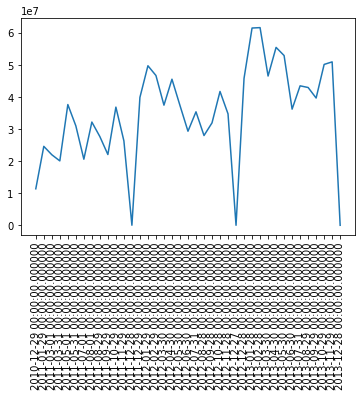

In [7]:
img = df.groupby('Date', as_index = False)['Amount'].sum()
plt.plot(img.Date, img.Amount)
plt.xticks( rotation='vertical')

In [9]:
df.ScenarioKey.unique()

array([1., 2.])

In [11]:
df.AccountKey.unique()

array([ 60.,  61.,  62.,  65.,  66.,  67.,  68.,  69.,  71.,  73.,  74.,
        76.,  77.,  78.,  80.,  81.,  82.,  83.,  84.,  85.,  87.,  89.,
        90.,  91.,  92.,  94.,  96.,  12.,  52.,  53.,  56.,  57.,  63.,
        72.,  97.,  99., 101.,   4.,   6.,   7.,   8.,  13.,  14.,  15.,
        18.,  19.,  20.,  21.,  22.,  23.,  24.,  28.,  29.,  31.,  32.,
        33.,  34.,  35.,  37.,  38.,  39.,  40.,  42.,  43.,  45.,  46.,
       100.,  10.,  11.,  54.,  93.])